# Ejercicio 2
## Generar dos datasets gausianos de diferente media y varianza. Graficar el ROC

In [1]:
# Agrando un poco los margenes del notebook
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import random

In [3]:
## defino la funcion para armarme el dataset clasificado

In [4]:
def create_dataset(popul_A, popul_B):
    
    labeled_A = []
    labeled_B = []
    
#asigno labels a ambas clases

    for elemA,elemB in zip(popul_A, popul_B):
        auxA = (0, elemA)
        auxB = (1, elemB)
        labeled_A.append(auxA)
        labeled_B.append(auxB)

    data_set = labeled_A + labeled_B
    random.shuffle(data_set)
    data_set.sort(reverse=True, key=lambda tup: tup[1])
    
    return data_set

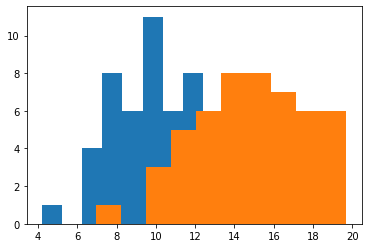

In [5]:
    mu1,sigma1 = 10, 2
    mu2,sigma2 = 15, 3
    
    popul_A = np.random.normal(mu1, sigma1, 50)
    popul_B = np.random.normal(mu2, sigma2, 50)
    
    plt.hist(popul_A)
    plt.hist(popul_B)
    plt.show()
    

In [6]:

data_set = create_dataset( popul_A, popul_B)
# Tengo 50 elementos en cada categoria, divido mis ejes en 50 partes.
# le asigno 51 elementos para que el primero sea cero y la curva empieze graficandod esde el origen. El valor 0 de la curva ROC es el elemento 1 del array

tpr = [0]*51  
fpr = np.linspace(0,1,num=51)
idx = 1
ctr = 0

# Obtengo el TPR y FPR de mi dataset clasificado

for a_tuple in data_set:
    
    if a_tuple[0]:
        ctr = ctr + 1
        tpr[idx] = ctr
    else:
         tpr[idx] = ctr
         idx = idx + 1
   



## Ahora imprimo el ROC obtenido y la recta identidad

Text(0.5, 0.98, 'Curva ROC')

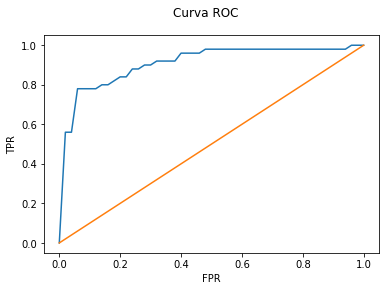

In [7]:

plt.plot(fpr,np.array(tpr)/50)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.suptitle('Curva ROC')

In [8]:
## para hacer el clasificador no supervisado podriamos aplicar un algoritmo para estimacion de parametros al estilo de k-means o Exp. Maximization.